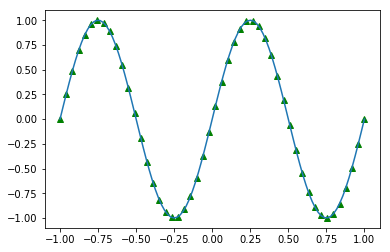

In [5]:
# Regression exercise
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl


#y = sin(2∏x)
f = lambda x: np.sin(2*np.pi*x)

#plot the trend line
x0 = np.linspace(-1,1,100)
y0 = f(x0)

#sampling
x = np.linspace(-1,1,50)
y = f(x)

#plot both 
#xyplot(x, y, x0, y0, title = 'test')
plt.plot(x, y, 'g^', x0, y0) 
plt.show()



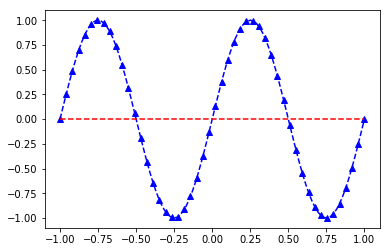

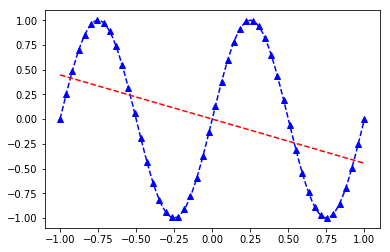

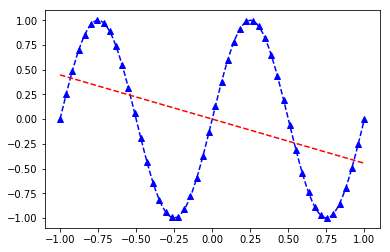

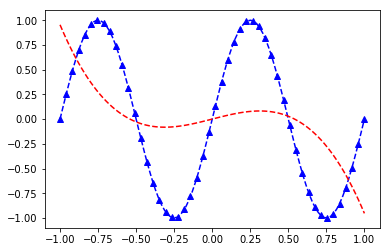

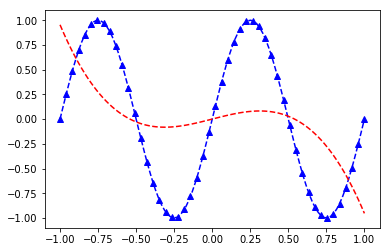

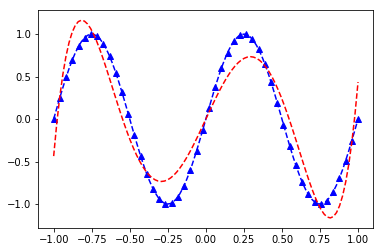

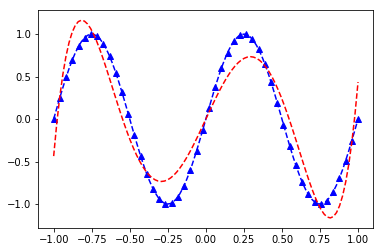

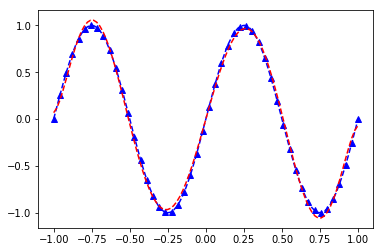

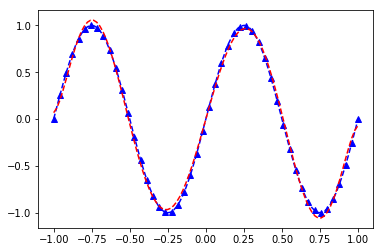

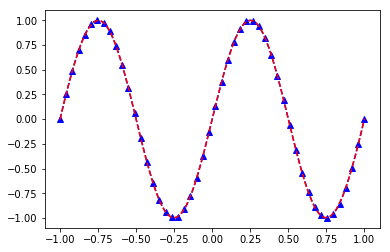

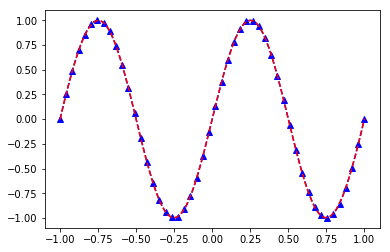

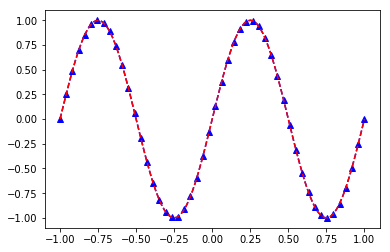

0 0.00
1 0.00&-0.45
2 0.00&-0.45& 0.00
3 0.00& 0.39&-0.00&-1.35
4 0.00& 0.39&-0.00&-1.35& 0.00
5 0.00& 3.86&-0.00&-16.93& 0.00&13.51
6 0.00& 3.86&-0.00&-16.93& 0.00&13.51&-0.00
7 0.00& 5.77&-0.00&-33.58& 0.00&48.90&-0.00&-21.17
8 0.00& 5.77&-0.00&-33.58& 0.00&48.90&-0.00&-21.17& 0.00
9 0.00& 6.22&-0.00&-39.95& 0.00&73.04&-0.00&-54.62& 0.00&15.32
10 0.00& 6.22&-0.00&-39.95& 0.00&73.04&-0.00&-54.62& 0.00&15.32&-0.00
11 0.00& 6.28&-0.00&-41.19& 0.00&80.28&-0.00&-71.78& 0.00&32.99&-0.00&-6.58


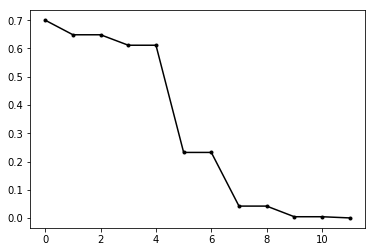

In [6]:
#regression

#Maximum degree of fit = 12
M = 12

#array to store the errors
rms = []

#array to store weight
weights = []

for i in range(0, M):
    #basis functions for sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    #for plotting the result
    hPhi = np.array([pow(x0,j) for j in range(0, i+1)]).transpose()
    
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
    weights.append(w)
    
    yp = np.matmul(Phi,w)
    rms.append(np.sqrt(np.sum(pow(y-yp,2))/x.size))
    
    x3 = x0
    y3 = np.matmul(hPhi, w)
    #x,y are the dots, x0, y0 is the sin trend, 
    plt.plot(x, y,'b^', x0, y0 , 'b--', x3, y3, 'r--')
    plt.show()
    
plt.plot(rms,'k.-')  
#output weights
for i, w in enumerate(weights):
    print(str(i) + '&'.join(['{:5.2f}'.format(i) for i in w]))
    
    


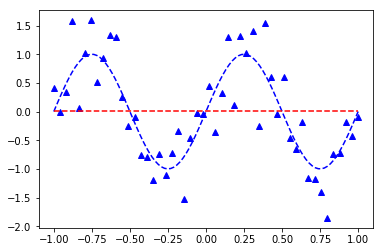

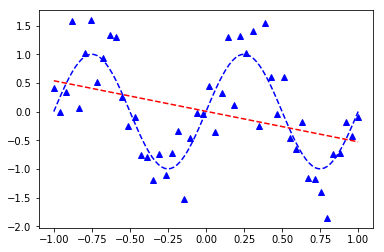

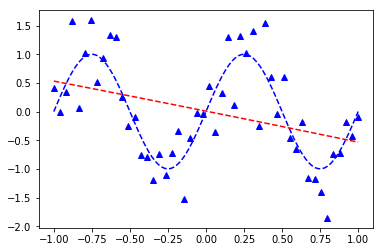

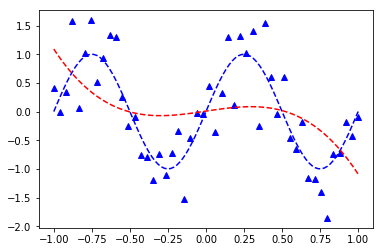

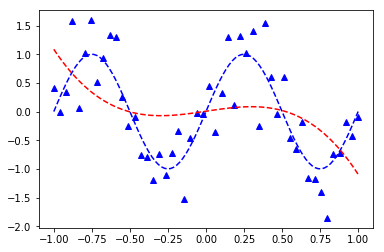

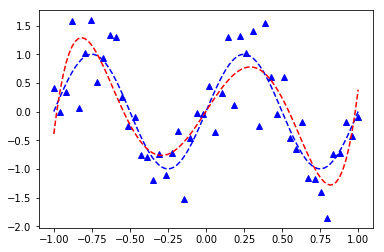

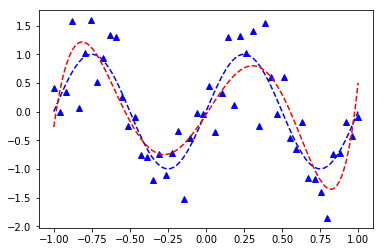

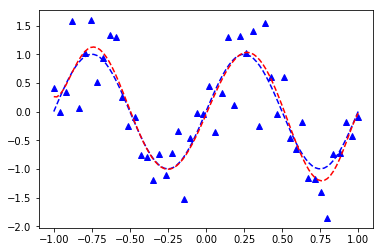

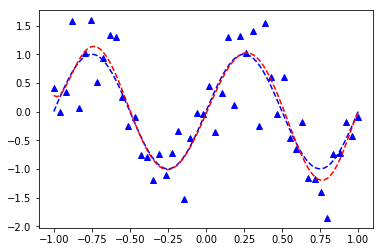

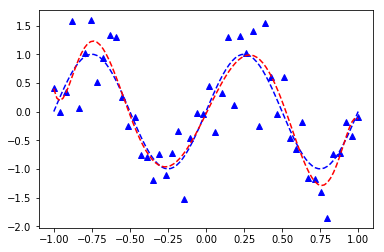

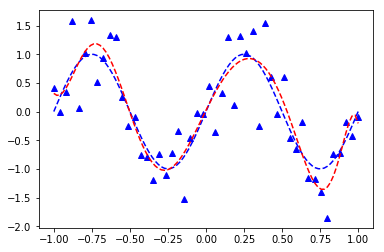

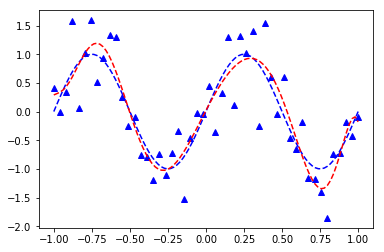

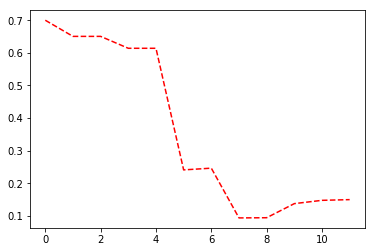

In [7]:
# the case with noise

#generate the noise
np.random.seed(123123)
yn = f(x) + 0.5*np.random.randn(x.size)

rms = []

weights = []

for i in range(0, M):
    #basis functions for sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    #for plotting the result
    hPhi = np.array([pow(x0,j) for j in range(0, i+1)]).transpose()
    
    w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),yn))
    weights.append(w)
    
    yp = np.matmul(Phi,w)
    rms.append(np.sqrt(np.sum(pow(y-yp,2))/x.size))
    
    x3 = x0
    y3 = np.matmul(hPhi, w)
    #x,y are the dots, x0, y0 is the sin trend, 
    plt.plot(x, yn,'b^', x0, y0 , 'b--', x3, y3, 'r--')
    plt.show()
    
plt.plot(rms, 'r--')

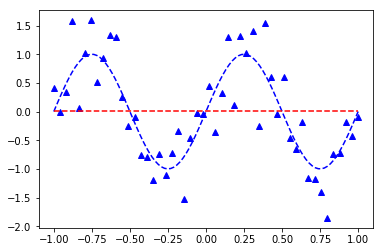

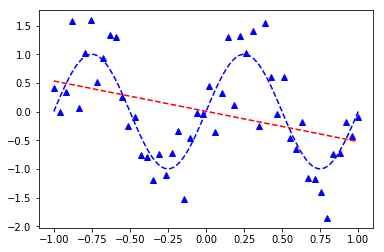

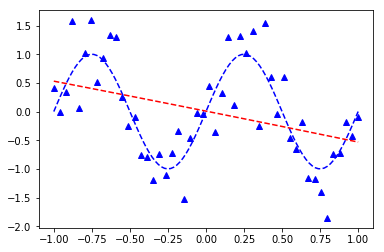

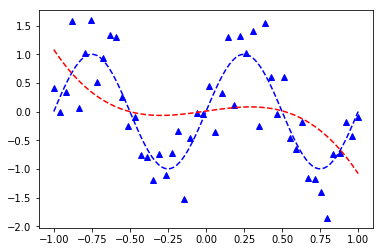

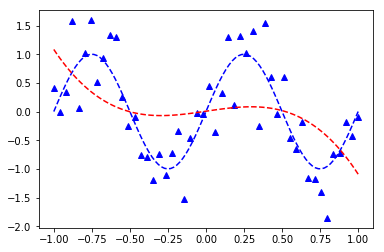

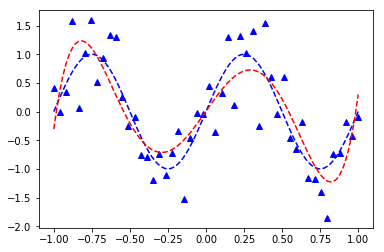

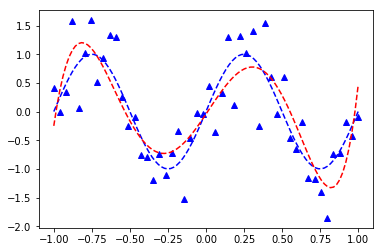

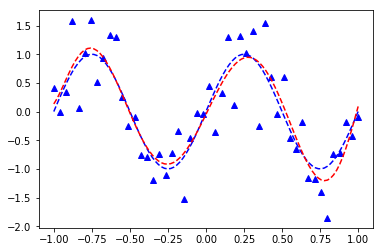

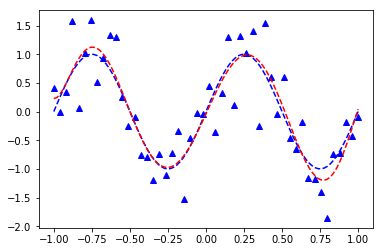

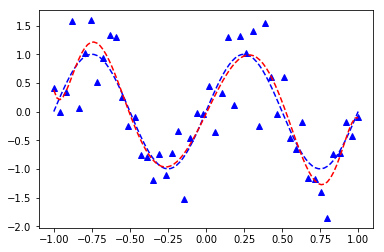

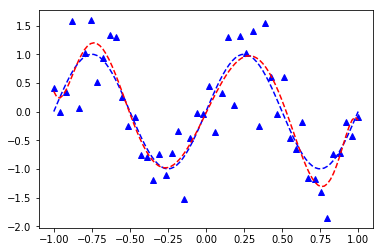

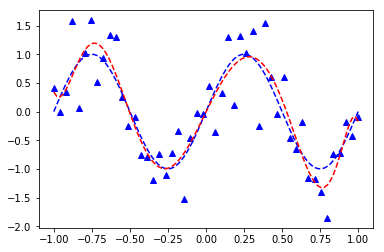

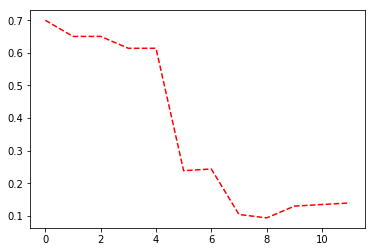

In [20]:
#regularisation
# more data sampled (-1, 1, 50)

np.random.seed(123123)
yn = f(x) + 0.5*np.random.randn(x.size)

rms = []

weights = []

for i in range(0, M):
    
    lam = math.exp(-(i+1))
    #lam = pow(10, -(i+1))
    #basis functions for sampled data
    Phi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    #for plotting the result
    hPhi = np.array([pow(x0,j) for j in range(0, i+1)]).transpose()
    
    # to make the equation shorter
    temp= np.add(np.matmul(Phi.transpose(),Phi), np.multiply(lam, np.identity(i+1)))
    
    w = np.linalg.solve(temp, np.matmul(Phi.transpose(),yn))
    
    weights.append(w)
    
    yp = np.matmul(Phi,w)
    rms.append(np.sqrt(np.sum(pow(y-yp,2))/x.size))
    
    x3 = x0
    y3 = np.matmul(hPhi, w)
    #x,y are the dots, x0, y0 is the sin trend, 
    plt.plot(x, yn,'b^', x0, y0 , 'b--', x3, y3, 'r--')
    plt.show()
    
plt.plot(rms, 'r--')
plt.title = ('rms')